In [1560]:
## I am using the following dataset from kaggle for my neural networks project: 
## https://www.kaggle.com/datasets/neriyafilber/binary-letters-vectors-represntation

In [1561]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [1562]:
dataset = "combined_letters.csv"
read = pd.read_csv(dataset)

In [1563]:
letter = read['Letter']
bitVector = read['64-Bit Vector']
fontNumber = read['Font Number']

In [1564]:
# features = [letter, bitVector, fontNumber]
# X = dataset[features]
# y = features[2]

In [1565]:
## 1. pre-process variables 
## 2. pick the values for X and y
## 3. fit the data to the neural network model

In [1566]:
## this block is pre-processing for the letter colunm ##

letterArr = []
indexArr = []

for i in range(letter.size):
    letterArr.append(letter[i])
    indexArr.append(i)

mappings = dict(zip(letterArr, indexArr))
print(mappings)

{'A': 4, 'B': 9, 'C': 14, 'D': 19, 'E': 24, 'F': 29, 'G': 34, 'H': 39, 'I': 44, 'J': 49, 'K': 54, 'L': 59, 'M': 64, 'N': 69, 'O': 74, 'P': 79, 'Q': 84, 'R': 89, 'S': 94, 'T': 99, 'U': 104, 'V': 109, 'W': 114, 'X': 119, 'Y': 124, 'Z': 129}


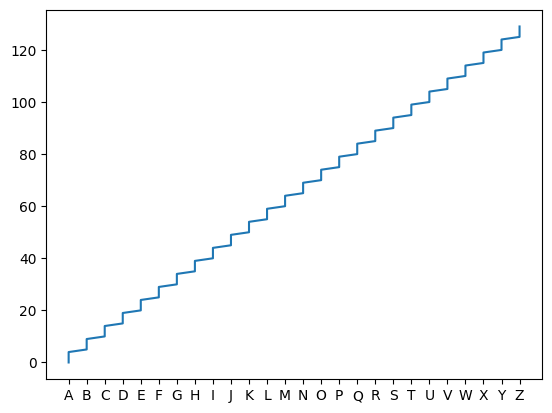

In [1567]:
plt.plot(letterArr, indexArr)

In [1568]:
s = set()
for x in fontNumber:
    s.add(x)
print(s)

{1, 2, 3, 4, 5}


In [1569]:
## below I am using the same dataset that I used for my svm project (but this will probably change very soon!!!)

In [1570]:
from sklearn.datasets import load_iris 
iris = load_iris()

In [1571]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [1572]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [1573]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [1574]:
X = iris.feature_names

In [1575]:
X = df.drop(['target'], axis='columns')

In [1576]:
y = df['target']

In [1577]:
from sklearn.model_selection import train_test_split

In [1578]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1579]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1580]:
scaler.fit(X_train)

StandardScaler()

In [1581]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1582]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [1583]:
nn

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [1584]:
nn.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [1585]:
pred = nn.predict(X_test)

In [1586]:
pred

array([1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1,
       2, 2, 0, 0, 0, 0, 0, 0])

In [1587]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred)

In [1588]:
matrix

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  5]])

In [1589]:
print(nn.score(X_train, y_train))

0.9833333333333333
